# 모델 성능 평가지표
>실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법

# 회귀 모형 성능 측정

## Linear Regression 학습 및 예측

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape , target.shape

((442, 10), (442,))

In [4]:
from sklearn.model_selection import train_test_split

SEED=42
X_train, X_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
X_train.shape, X_valid.shape,y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [5]:
from sklearn.linear_model import LinearRegression 
#모델 생성
model = LinearRegression()
#모델 학습
model.fit(X_train,y_train)
#모델 예측
pred = model.predict(X_valid)

In [6]:
pred.shape, y_valid.shape

((111,), (111,))

## 회귀 평가 지표

### R2(결정계수 ; Coefficient of Determination)

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_vaild, pred)  
r2

0.48490866359058016

### MSE
- 실제값과 예측값의 차이를 제곱한 뒤 평균화
- 손실함수로 사용

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid,pred)
mse

2848.2953079329427

### RMSE

In [12]:
import numpy as np
np.sqrt(mse)

53.36942296795931

### MAE
- 실제값과 예측값 차이의 절대값 평균

In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,pred)
mae

41.54836328325206

### MAPE
- 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현
- 0에 가까울 수록 모델학습 잘 된것

In [15]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid,pred)

0.3731095161631555

### SMAPE
- MAPE의 단점 보완

In [17]:
def smape(true, pred):
    error = np.abs(true-pred) / (np.abs(true) +np.abs(pred))
    return np.mean(error)

smape(y_valid, pred)

0.15271360402048706

# 분류 모형 성능 평가

## 혼동행렬
> 분석 모델에서 구한 분류의 예측 범주와 데이터의 실제 분류 범주률 교차 표 형태로 정리한 행렬
- Accuracy : 정확도
- Specificity : 특이도
- Recall, Sensitivity : 민감도
- Precisosn : 정밀도

In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

digits = load_digits()

In [22]:
data = digits.data

# Binary Classifier - 손글씨 데이터
target = (digits.target == 5).astype(int)

In [ ]:
#이진 분류 데이터 만들기

In [23]:
int(5==5)

1

In [24]:
int(4 == 5)

0

In [26]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_valid, y_train, y_valid = train_test_split(data,target, random_state=SEED)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [27]:
# 원본 데이터
digit = data[5]
digits.target[5]

5

In [28]:
#변경한 데이터 
target[5]

1

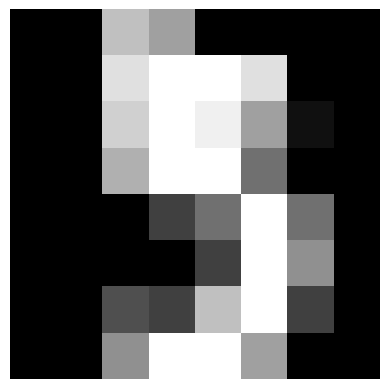

In [30]:
# 손글씨 확인 

import matplotlib as mpl
import matplotlib.pyplot as plt

#벡터 변환
digit_img = digit.reshape(8,8)

plt.imshow(digit_img, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
digit

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [31]:
digit_img

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [42]:
#손글씨 3 
Three = data[3]

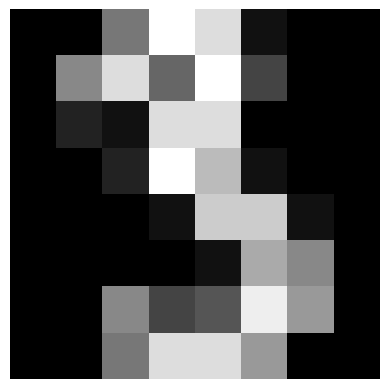

In [41]:
Three_img = Three.reshape(8,8)

plt.imshow(Three_img, cmap='gray')
plt.axis('off')
plt.show()

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

sgd_clf.predict([digit])

array([0])

In [46]:
from sklearn.model_selection import cross_val_predict  #교차검증

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1217,    7],
       [   8,  115]], dtype=int64)

### 모델 예측

#### Accuracy(정확도)

- Dummy 예측

In [50]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent') 
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_valid)

- 모델 예측

In [55]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

pred_clf = sgd_clf.predict(X_valid)

In [57]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, pred_dummy)
print(f'dummy:{score}')

score =  accuracy_score(y_valid,pred_clf)
print(f'model:{score}')

dummy:0.8688888888888889
model:0.9866666666666667


In [58]:
# 데이터가 unbalance한 경우에는 dummy의 예측이 더 잘 맞을 수 있음
# accuracy만 신뢰 할 수 없음

#### Precision (정밀도)

In [65]:
from sklearn.metrics import precision_score
score = precision_score(y_valid, pred_dummy)
print(f'dummy: {score}')

score = precision_score(y_valid, pred_clf)
print(f'model: {score}')

dummy: 0.0
model: 1.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Sensitivity(민감도) = Recall(재현도) = TPR

In [68]:
from sklearn.metrics import recall_score
score = recall_score(y_valid, pred_dummy)
print(f"dummy: {score}")

score = recall_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.8983050847457628


#### F1 score

In [62]:
from sklearn.metrics import f1_score
score = f1_score(y_valid, pred_dummy)
print(f'dummy: {score}')

score = f1_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.9464285714285715


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,pred_dummy))
print('-'*100)
print(classification_report(y_valid,pred_clf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       391
           1       0.00      0.00      0.00        59

    accuracy                           0.87       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.87      0.81       450

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       1.00      0.90      0.95        59

    accuracy                           0.99       450
   macro avg       0.99      0.95      0.97       450
weighted avg       0.99      0.99      0.99       450



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 임계값
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수 사이에 실수를 예측값으로 출력
- 사이킷런에서는 predict_proba(), dicision_funtion() 제공
> predict_proba(): 0.5 이상이면 1로 예측
> dicision_funtion(): 0 이상이면 1로 예측

In [66]:
pred_proba = sgd_clf.decision_function(X_valid)

In [70]:
threshold = 0 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(1.0, 0.8983050847457628)

In [71]:
threshold = 30000
pred = np.where(pred_proba > threshold , 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [72]:
threshold = -30000
pred = np.where(pred_proba > threshold , 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.13111111111111112, 1.0)

- DecisionTreeClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성
tree = DecisionTreeClassifier (max_depth=3, random_state=SEED)
# 모델 학습
tree.fit(X_train, y_train)
# 모델 평가 : predict -> predict_proba(확률)을 아용해 threshold를 적용할 결과
pred_tree = tree.predict(X_valid) 

In [77]:
pred_tree[:3]

array([0, 0, 0])

In [78]:
pred_proba =  tree.predict_proba(X_valid)[:,1]

In [79]:
pred_proba[:3]

array([0.02371542, 0.01059322, 0.01059322])

In [80]:
threshold = 0.5 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9811320754716981, 0.8813559322033898)

In [81]:
threshold = 0.9
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9811320754716981, 0.8813559322033898)

In [82]:
threshold = 0.1
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.8813559322033898, 0.8813559322033898)

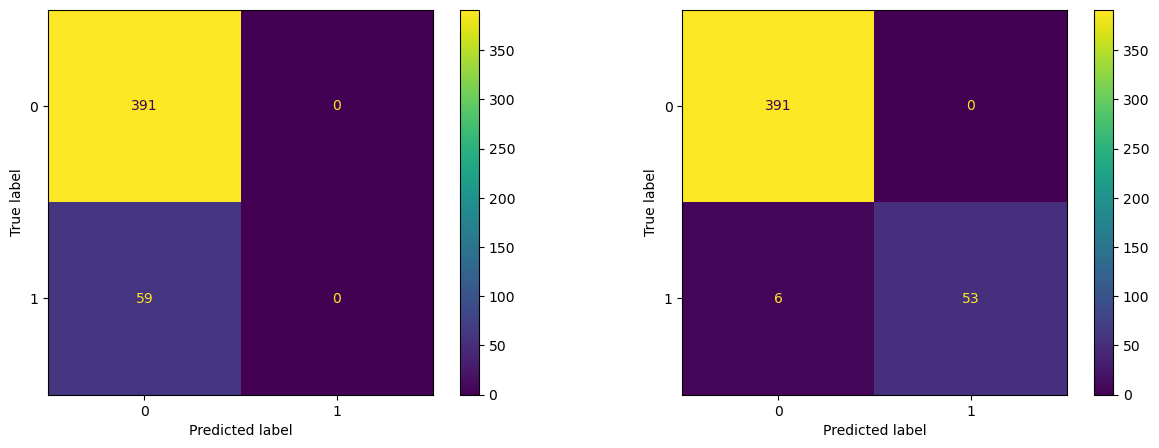

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_valid,pred_dummy) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid,pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, pred_clf)

array([[391,   0],
       [  6,  53]], dtype=int64)

## ROC curve 

In [87]:
pred_dummy = dummy.predict_proba(X_valid)[:,1]  #1에 대한 확률만 
pred_tree = tree.predict_proba(X_valid)[:,1]

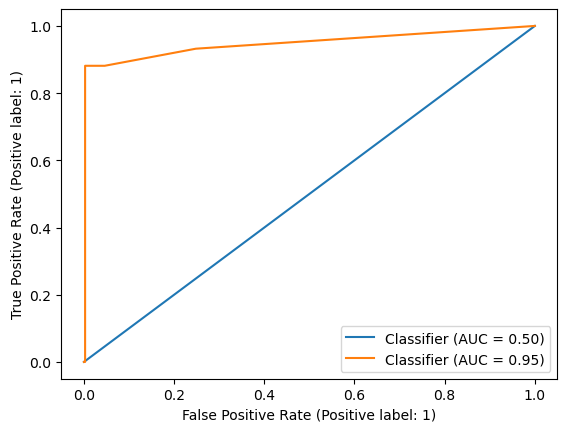

In [88]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid,pred_dummy,ax=ax)
RocCurveDisplay.from_predictions(y_valid,pred_tree,ax=ax)
plt.show()

### AUROC
- ROC Curve의 밑부분 면적

In [90]:
from sklearn.metrics import roc_curve, auc 

fpr, tpr, thresholds = roc_curve(y_valid,pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-'*50)
fpr, tpr, thresholds = roc_curve(y_valid,pred_tree)
print(f'model: {auc(fpr, tpr)}')

dummy: 0.5
--------------------------------------------------
model: 0.9479604664268065


## Multi Classification

In [91]:
digits = load_digits()

data = digits.data
target = digits.target

x_train,x_valid,y_train,y_valid = train_test_split(data,target,random_state=SEED)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [92]:
tree = DecisionTreeClassifier(max_depth = 5 , random_state=SEED)
tree.fit(x_train,y_train)
pred = tree.predict(x_valid)

In [94]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.32      0.32      0.32        37
           2       0.56      0.66      0.60        38
           3       0.87      0.85      0.86        46
           4       0.80      0.78      0.79        55
           5       0.73      0.19      0.30        59
           6       0.95      0.89      0.92        45
           7       0.90      0.68      0.78        41
           8       0.37      0.61      0.46        38
           9       0.52      0.85      0.65        48

    accuracy                           0.67       450
   macro avg       0.70      0.67      0.66       450
weighted avg       0.71      0.67      0.66       450



- Multi Classification 분류 방법

### 소프트맥스 함수(Softmax Function)
- 각 클래스에 대한 확률을 출력
- 입력받은 값들을 0~1사이의 값들로 모두 정규화하며 출력값들의 합은 항상 1이 되는 특성을 가진 함수

1.0


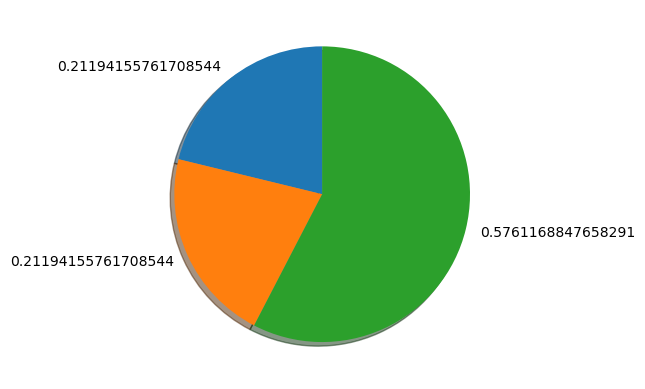

In [95]:
import numpy as np
import matplotlib.pyplot as plt
 
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
 
x = np.array([1.0,1.0,2.0])
 
y = softmax(x)
 
print(np.sum(y))
 
ratio = y
labels = y
 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()